# Image Captioning
An intelligent system for generating descriptive captions for images​

## Feature Extraction

### Extract the features from all the photos and save them to a file

In [7]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

def extract_photo_features(directory):
	model = VGG16()
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	print(model.summary())
	features = dict()
	for name in listdir(directory):
		file_name = directory + '/' + name
		image = load_img(file_name, target_size=(224, 224))
		image = img_to_array(image)
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		image = preprocess_input(image)
		feature = model.predict(image, verbose=0)
		id = name.split('.')[0]
		features[id] = feature
		print('>%s' % name)
	return features

directory = 'Flickr8k_Dataset/Flicker8k_Dataset'
features = extract_photo_features(directory)
print('Extracted Features: %d' % len(features))
dump(features, open('features.pkl', 'wb'))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None
>1000268201_693b08cb0e.jpg
>1001773457_577c3a7d70.jpg
>1002674143_1b742ab4b8.jpg
>1003163366_44323f5815.jpg
>1007129816_e794419615.jpg
>1007320043_627395c3d8.jpg
>1009434119_febe49276a.jpg
>1012212859_01547e3f17.jpg
>1015118661_980735411b.jpg
>1015584366_dfcec3c85a.jpg
>101654506_8eb26cfb60.jpg
>101669240_b2d3e7f17b.jpg
>1016887272_03199f49c4.jpg
>1019077836_6fc9b15408.jpg
>1019604187_d087bf9a5f.jpg
>1020651753_06077ec457.jpg
>1022454332_6af2c1449a.jpg
>1022454428_b6b660a67b.jpg
>1022975728_75515238d8.jpg
>102351840_323e3de834.jpg
>1024138940_f1fefbdce1.jpg
>102455176_5f8ead62d5.jpg
>1026685415_0431cbf574.jpg
>1028205764_7e8df9a2ea.jpg
>1030985833_b0902ea560.jpg
>103106960_e8a41d64f8.jpg
>103195344_5d2dc613a3.jpg
>103205630_682ca7285b.jpg
>1032122270_ea6f0beedb.jpg
>1032460886_4a598ed535.jpg
>1034276567_49bb87c51c.jpg
>104136873_5b5d41be75.jpg
>1042020065_fb3d3ba5ba.jpg
>1042590306_95dea0916c.jpg
>1045521051_108ebc19be.jpg
>1048710776_bb5b0a5c7c.jpg
>1052358063_eae6744153.jpg
>105

## Preprocess

In [14]:
import string

def load_document(file_name):
	file = open(file_name, 'r')
	text = file.read()
	file.close()
	return text

def get_descriptions_dict(doc):
	desc_map = dict()
	for line in doc.split('\n'):
		lines = line.split()
		if len(line) < 2:
			continue
		id, desc = lines[0], lines[1:]
		id = id.split('.')[0]
		desc = ' '.join(desc)
		if id not in desc_map:
			desc_map[id] = list()
		desc_map[id].append(desc)
	return desc_map

def preprocess(descriptions):
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuations
			desc = [w.translate(table) for w in desc]
			desc = [word for word in desc if len(word)>1]
			# remove numbers
			desc = [word for word in desc if word.isalpha()]
			desc_list[i] =  ' '.join(desc)

def create_vocabulary(descriptions):
	descriptions = set()
	for key in descriptions.keys():
		[descriptions.update(d.split()) for d in descriptions[key]]
	return descriptions

def write_to_file(descriptions, file_name):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(file_name, 'w')
	file.write(data)
	file.close()

file_name = 'Flickr8k_text/Flickr8k.token.txt'
doc = load_document(file_name)
descriptions = get_descriptions_dict(doc)
print('Loaded: %d ' % len(descriptions))
preprocess(descriptions)
vocabulary = create_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
write_to_file(descriptions, 'descriptions.txt')

Loaded: 8092 
Vocabulary Size: 8763


In [18]:
from pickle import load

def load_predefined_photo_ids(file_name):
	doc = load_document(file_name)
	dataset = list()
	for line in doc.split('\n'):
		# if not empty
		if len(line) < 1:
			continue
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

def add_start_end_tokens(file_name, dataset):
	doc = load_document(file_name)
	descriptions = dict()
	for line in doc.split('\n'):
		lines = line.split()
		id, desc = lines[0], lines[1:]
		if id in dataset:
			if id not in descriptions:
				descriptions[id] = list()
			desc = 'startseq ' + ' '.join(desc) + ' endseq'
			descriptions[id].append(desc)
	return descriptions

def load_photo_features(file_name, dataset):
	features_dict = load(open(file_name, 'rb'))
	features = {k: features_dict[k] for k in dataset}
	return features

file_name = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_predefined_photo_ids(file_name)
print('Dataset: %d' % len(train))
train_descriptions = add_start_end_tokens('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000


## Create Model

In [1]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import add
from keras.callbacks import ModelCheckpoint

def get_lines(descriptions):
	descriptions = list()
	for i in descriptions.keys():
		[descriptions.append(d) for d in descriptions[i]]
	return descriptions

def tokenize(descriptions):
	lines = get_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

def max_len_of_desc(descriptions):
	lines = get_lines(descriptions)
	return max(len(d.split()) for d in lines)

def create_ip_op_sequences(tokenizer, max_len_of_desc, desc_list, photo, vocab_size):
	X1, X2, y = list(), list(), list()
	for desc in desc_list:
		seq = tokenizer.texts_to_sequences([desc])[0]
		for i in range(1, len(seq)):
			in_seq, out_seq = seq[:i], seq[i]
			in_seq = pad_sequences([in_seq], maxlen=max_len_of_desc)[0]
			out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
			X1.append(photo)
			X2.append(in_seq)
			y.append(out_seq)
	return array(X1), array(X2), array(y)

def define_captioning_model(vocab_size, max_len_of_desc):
	# feature extractor model
	inputs1 = Input(shape=(4096,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_len_of_desc,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# merged model
	merged1 = add([fe2, se3])
	merged2 = Dense(256, activation='relu')(merged1)
	outputs = Dense(vocab_size, activation='softmax')(merged2)

	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	model.summary()
	return model

def data_generator(descriptions, photos, tokenizer, max_len_of_desc, vocab_size):
	while 1:
		for key, desc_list in descriptions.items():
			photo = photos[key][0]
			in_img, in_seq, out_word = create_ip_op_sequences(tokenizer, max_len_of_desc, desc_list, photo, vocab_size)
			yield [in_img, in_seq], out_word

file_name = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_predefined_photo_ids(file_name)
print('Dataset: %d' % len(train))
train_descriptions = add_start_end_tokens('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))
tokenizer = tokenize(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
max_len_of_desc = max_len_of_desc(train_descriptions)
print('Description Length: %d' % max_len_of_desc)

model = define_captioning_model(vocab_size, max_len_of_desc)
epochs = 20
steps = len(train_descriptions)
for i in range(epochs):
	generator = data_generator(train_descriptions, train_features, tokenizer, max_len_of_desc, vocab_size)
	model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
	model.save('model_' + str(i) + '.h5')

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7579
Description Length: 34
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 34)]                 0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 4096)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 34, 256)              1940224   ['input_2[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 4096)                 0         ['input_1[0][0]']     

C:\Users\Sehreen Khan\AppData\Local\Temp\ipykernel_23604\1067079861.py:170: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)


6000/6000 [==============================] - 4138s 689ms/step - loss: 4.6889


C:\Users\Sehreen Khan\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6000/6000 [==============================] - 3066s 511ms/step - loss: 3.0642


## Evaluation

In [2]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

def generate_desc(model, tokenizer, photo, max_len_of_desc):
	in_text = 'startseq'
	for i in range(max_len_of_desc):
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		sequence = pad_sequences([sequence], maxlen=max_len_of_desc)
		# predicting the next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert the probability into integer
		yhat = argmax(yhat)
		# map the integer to word
		word = word_for_id(yhat, tokenizer)
		if word is None:
			break
		in_text += ' ' + word
		if word == 'endseq':
			break
	return in_text

def evaluate_model(model, descriptions, photos, tokenizer, max_len_of_desc):
	actual, predicted = list(), list()
	for key, desc_list in descriptions.items():
		yhat = generate_desc(model, tokenizer, photos[key], max_len_of_desc)
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# Train set
file_name = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_predefined_photo_ids(file_name)
print('Dataset: %d' % len(train))
train_descriptions = add_start_end_tokens('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
tokenizer = tokenize(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
max_len_of_desc = max_len_of_desc(train_descriptions)
print('Description Length: %d' % max_len_of_desc)


# Test set
file_name = 'Flickr8k_text/Flickr_8k.testImages.txt'
test = load_predefined_photo_ids(file_name)
print('Dataset: %d' % len(test))
test_descriptions = add_start_end_tokens('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))

file_name = 'model_10.h5'
model = load_model(file_name)
evaluate_model(model, test_descriptions, test_features, tokenizer, max_len_of_desc)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.535584
BLEU-2: 0.282761
BLEU-3: 0.185808
BLEU-4: 0.079981


## Dump Tokenizer

In [5]:
from keras.preprocessing.text import Tokenizer
from pickle import dump

file_name = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_predefined_photo_ids(file_name)
print('Dataset: %d' % len(train))
train_descriptions = add_start_end_tokens('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
tokenizer = tokenize(train_descriptions)
dump(tokenizer, open('tokenizer.pkl', 'wb'))

Dataset: 6000
Descriptions: train=6000


In [2]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model
from PIL import Image

tokenizer = load(open('tokenizer.pkl', 'rb'))
max_len_of_desc = 34
model = load_model('model_10.h5')


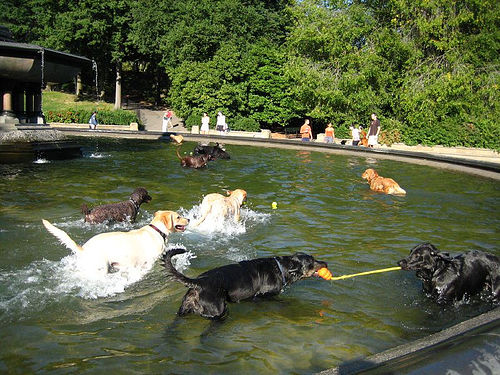

startseq dog is running through the water endseq


In [14]:
# load and prepare the photograph
image_path = 'example.jpg'
photo = extract_photo_features(image_path)

# show image
image = Image.open(image_path)
display(image)

# generate description
description = generate_desc(model, tokenizer, photo, max_len_of_desc)
print(description)

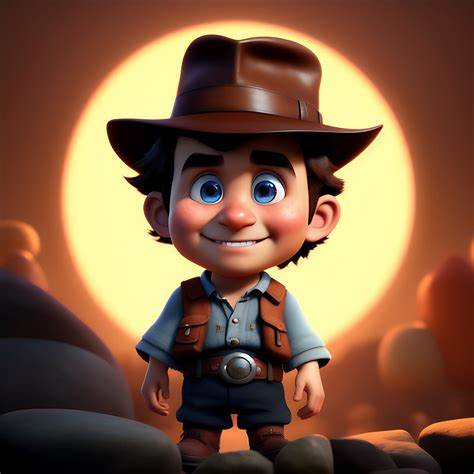

startseq man in black shirt is standing on the street endseq


In [18]:
# load and prepare the photograph
image_path = 'OIP (1).jfif'
photo = extract_photo_features(image_path)

# show image
image = Image.open(image_path)
display(image)

# generate description
description = generate_desc(model, tokenizer, photo, max_len_of_desc)
print(description)

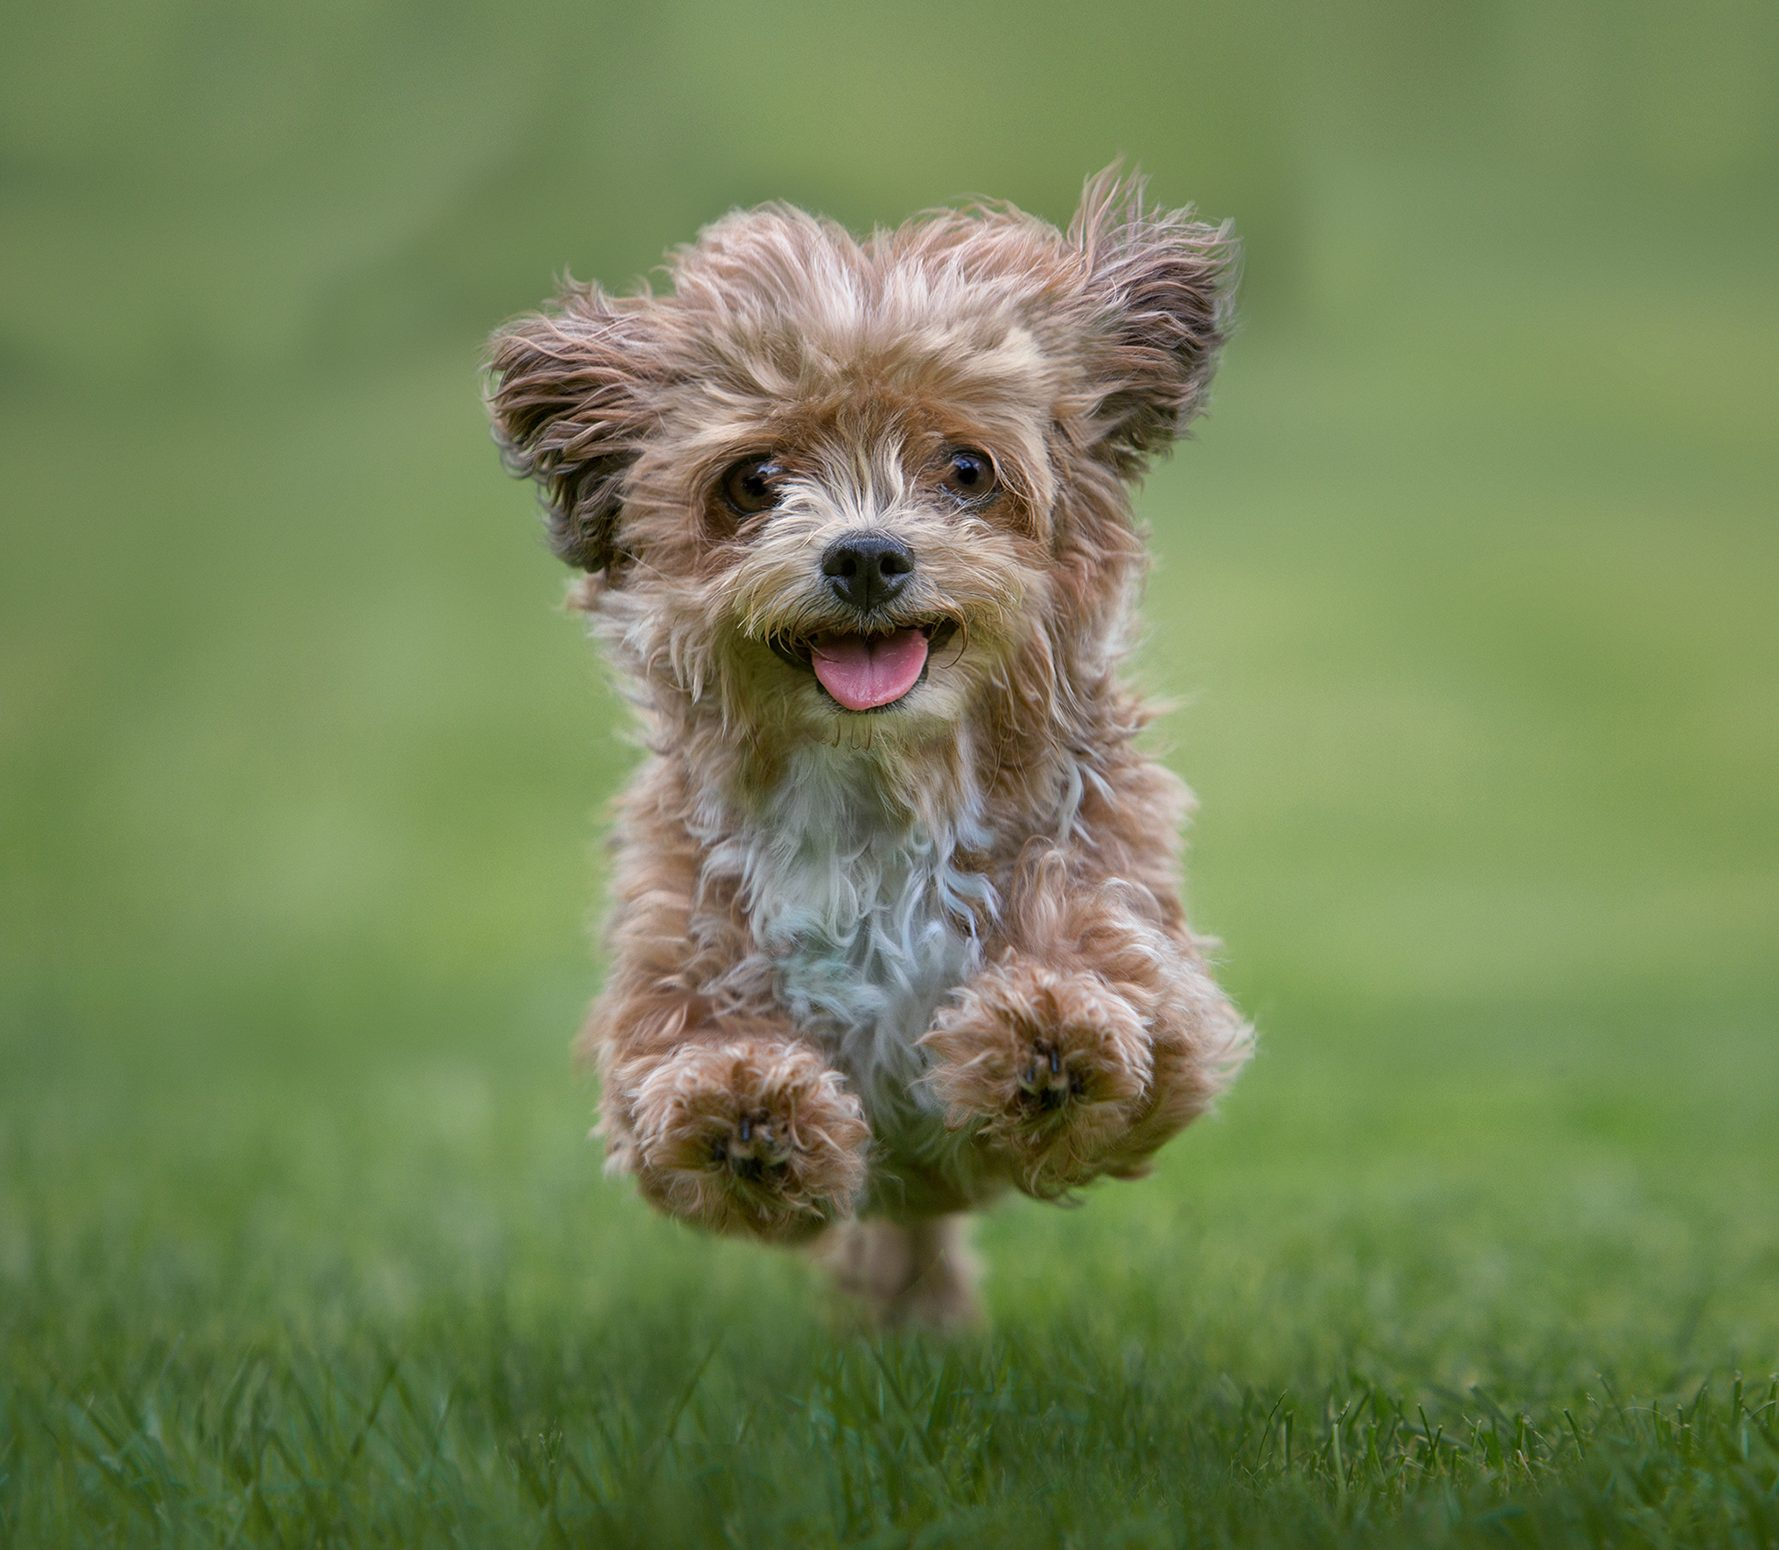

startseq dog is running through the grass endseq


In [26]:
# load and prepare the photograph
image_path = 'dog.jpg'
photo = extract_photo_features(image_path)

# show image
image = Image.open(image_path)
display(image)

# generate description
description = generate_desc(model, tokenizer, photo, max_len_of_desc)
print(description)

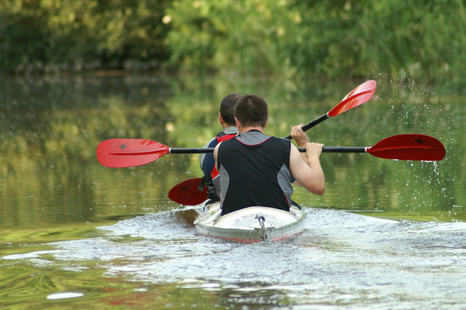

startseq two children are playing in the grass endseq


In [29]:
# load and prepare the photograph
image_path = 'R.jfif'
photo = extract_photo_features(image_path)

# show image
image = Image.open(image_path)
display(image)

# generate description
description = generate_desc(model, tokenizer, photo, max_len_of_desc)
print(description)